# 1. Introduction & Dataset Overview
**Introduction:**
In this project, I analyze a real-world dataset from Kaggle containing information about movies and TV shows available on the streaming platform Netflix.
**Context:**
The dataset includes attributes such as title, director, cast, country, release year, rating, and content type.
This dataset is suitable for analysis because it contains over 8,000 rows and multiple categorical and numerical fields, making it ideal for descriptive analytics, visualization, and pattern exploration.

**Dataset:** 
Netflix Movies and TV Shows: https://www.kaggle.com/shivamb/netflix-shows 

**Research questions**
1. What types of content (Movies vs TV Shows) dominate the platform?
2. Which countries produce the most Netflix titles?
3. What are the common content ratings (TV-MA, PG, etc.)?
4. Are movies or TV shows longer on average?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)  #using pd.set_option to display all the columns and rows when we see the dataset instead of dotted lines.
pd.set_option('display.max_rows', None)
pd.set_option('display.width',140)       #display.width to see each column properly

Below we load the dataset and display basic information using `.info()`, `.shape`, and `.describe()`. This initial exploration gives an overview of data types, missing values, and basic distributions.

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
rows,columns= df.shape
print(f"The dataset contains {rows} Rows and {columns} Columns")

The dataset contains 8807 Rows and 12 Columns


In [4]:
df.info()
#shows which column has missing values and which dtype might need conversion.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe(include="all")
#include="all" to see summary statistics for all columns numeric and object.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
#First 10 rows for context of dataset
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# 2. Data Cleaning and Preparation

**Steps Involved**
1) Standardize column names (readability and reproducibility)
2) Parse date_added to datetime
3) Convert duration -> duration_minutes numeric: Convert strings like '90 min' -> 90.0. Convert '2 Seasons' -> approximate minutes assuming 10 eps × 30 min per season. Return np.nan if cannot parse.
4) Extract primary genre and primary country for simple grouping
5) Handling missing values
6) Filtering, Subsetting, and Merging
7) Saving a cleaned copy 

In [7]:
#1) Standardize column names (readability and reproducibility)
df.columns = (df.columns.str.strip().str.lower().str.replace(' ', '_'))
display(list(df.columns))
# .strip() removes surrounding whitespace.
# .lower() makes all names lower-case for consistency.
# .replace(' ', '_') converts spaces to underscores (Python identifier friendly).

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [8]:
#2) Parse date_added to datetime- for consistent date format
if 'date_added' in df.columns:
    df['date_added'] = pd.to_datetime(df['date_added'],errors = 'coerce')
df.head()
#errors = 'coerce' - it will change all invalid parsing into NaT(not a time). pandas way of null

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
#3) Convert duration -> duration_minutes numeric and add values in new column duration_minutes and nan if null.
def parse_duration_to_minutes(s):
    if pd.isna(s):                         #pd.isna() as it checks if that single value is NaN
        return np.nan
    duration = str(s).strip().lower()
    if 'min' in duration:
        try:
            val= float(duration.replace('min',''))
            return val
        except:
            return np.nan
    if 'season' in duration:
        try:
            num = float(duration.split()[0])
            return num *10 * 30
        except:
            return np.nan
    return np.nan

if 'duration' in df.columns:
    df['duration_minutes'] = df['duration'].apply(parse_duration_to_minutes)

df.sample(5)        

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
6367,s6368,Movie,Boy Bye,Chris Stokes,"Wendy Raquel Robinson, Ross Fleming, Shondrell...",United States,2019-04-02,2016,TV-MA,86 min,"Comedies, Romantic Movies",Single entrepreneur Veronica finally starts to...,86.0
7392,s7393,TV Show,Man vs Wild with Sunny Leone,NaN,"Bear Grylls, Sunny Leone",NaN,2018-12-01,2018,TV-PG,1 Season,"International TV Shows, Reality TV, TV Action ...",The adventures of Bear Grylls get a unique spi...,300.0
7882,s7883,Movie,Rocky IV,Sylvester Stallone,"Sylvester Stallone, Talia Shire, Burt Young, C...",United States,2019-08-01,1985,PG,92 min,"Dramas, Sports Movies","Rocky Balboa takes on the Cold War, coming out...",92.0
1296,s1297,TV Show,"Hello, Me!",NaN,"Choi Kang-hee, Kim Young-kwang, Lee Re, Um Mun...",South Korea,2021-02-18,2021,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Miserable and unsuccessful, a woman thinks she...",300.0
1293,s1294,TV Show,Pitta Kathalu,"Tharun Bhascker Dhaassyam, B. V. Nandini Reddy...","Manchu Lakshmi, Saanve Megghana, Naveen Kumar,...",India,2021-02-19,2021,TV-MA,1 Season,"International TV Shows, TV Dramas","From secrets and lies to jealousy and control,...",300.0


In [10]:
#4) Extract primary genre and primary country for simple grouping
if 'listed_in' in df.columns:
    df['primary_genre'] = df['listed_in'].fillna('Unknown').str.split(',').str[0].str.strip()

if 'cast' in df.columns:
    df['primary_country'] = df['country'].fillna('Unknown').str.split(',').str[0].str.strip()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,primary_genre,primary_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,Documentaries,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",600.0,International TV Shows,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,300.0,Crime TV Shows,Unknown
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",300.0,Docuseries,Unknown
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,600.0,International TV Shows,India


In [11]:
#checking null values
df.isna().sum()

show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
date_added            98
release_year           0
rating                 4
duration               3
listed_in              0
description            0
duration_minutes       3
primary_genre          0
primary_country        0
dtype: int64

How I handled Missing Values:

The dataset contains missing values in several columns.
I applied different strategies depending on the importance and purpose of each variable:

'director', 'cast', 'country'-  These columns contain many missing entries, but they are descriptive fields and not required for numerical analysis. Dropping rows would remove large amounts of useful data.
Solution: Filled missing values with "Unknown".

date_added - Required for visualizations. Missing values were replaced with the mode, which preserves distribution shape.

rating- Very few values missing(4 values). Filled with mode, as ratings are categorical.

duration_minutes- A numerical field needed for scatter plots and boxplots. Only 3 values were missing.
Filled using the median duration to avoid skewing due to outliers. This approach keeps the dataset complete, minimizes information loss, and maintains analytical accuracy.

In [12]:
#Fill text columns with "Unknown"
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

# Fill date_added with the most common year added
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])  #.mode()[0] as there can be more than 1 mode so take the 1st mode

#Fill null ratings with the most common rating
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

#Fill duration_minutes with median values
df['duration_minutes'] = df['duration_minutes'].fillna(df['duration_minutes'].median())

missing_summary= df.isna().sum().sort_values(ascending= False) 
display(missing_summary)

duration            3
type                0
show_id             0
director            0
cast                0
country             0
title               0
date_added          0
release_year        0
rating              0
listed_in           0
description         0
duration_minutes    0
primary_genre       0
primary_country     0
dtype: int64

**6) Filtering, Subsetting, and Merging**

To prepare the dataset for deeper analysis, I performed subsetting, several filtering and merging operations.

**Subsetting**

I created a subset of important columns such as title, type, country, release year, rating, and duration.
This makes the data more manageable and ensures the analysis focuses on meaningful variables.
Subsetting helps improve readability and performance by removing unnecessary text-heavy fields like description and cast.

In [13]:
# Subset the dataset to keep only the important analytical columns
df_subset = df[['title', 'type', 'country', 'release_year', 'rating', 'duration_minutes', 'primary_genre']]
df_subset.head()

,title,type,country,release_year,rating,duration_minutes,primary_genre
0,Dick Johnson Is Dead,Movie,United States,2020,PG-13,90.0,Documentaries
1,Blood & Water,TV Show,South Africa,2021,TV-MA,600.0,International TV Shows
2,Ganglands,TV Show,Unknown,2021,TV-MA,300.0,Crime TV Shows
3,Jailbirds New Orleans,TV Show,Unknown,2021,TV-MA,300.0,Docuseries
4,Kota Factory,TV Show,India,2021,TV-MA,600.0,International TV Shows


**Filtering**

I filtered the dataset to include only Movies.
This helps analyze duration, ratings, and release year trends specifically for movies.

In [14]:
movies = df[df['type'] == 'Movie']
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,primary_genre,primary_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,Documentaries,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,Children & Family Movies,Unknown
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,Dramas,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0,Comedies,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0,Dramas,Germany


I also filtered TV Shows separately to compare their distribution with movies.


In [15]:
tv_shows = df[df['type'] == 'TV Show']
tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,primary_genre,primary_country
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",600.0,International TV Shows,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,300.0,Crime TV Shows,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",300.0,Docuseries,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,600.0,International TV Shows,India
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,300.0,TV Dramas,Unknown


**Merging**

To demonstrate merging, I created a small helper DataFrame mapping Netflix ratings to age categories (e.g., TV-MA → Adults).
I merged this table with the main dataset using a left join.
This enriches the data and allows for analysis based on audience age groups.

In [16]:
rating_category = pd.DataFrame({
    "rating": ["TV-MA", "TV-14", "PG-13", "R", "PG", "G"],
    "age_group": ["Adults", "Teens", "Teens", "Adults", "Family", "Kids"]
})
df_merged = df.merge(rating_category, on="rating", how="left")
df_merged.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,primary_genre,primary_country,age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,Documentaries,United States,Teens
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",600.0,International TV Shows,South Africa,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,300.0,Crime TV Shows,Unknown,Adults
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",300.0,Docuseries,Unknown,Adults
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,600.0,International TV Shows,India,Adults


In [17]:
#7) Saving a cleaned copy
df_merged.to_csv('netflix_titles_cleaned.csv', index = False)

# 3. Data Exploration and Analysis

1. Distribution of types (Movie vs TV Show)
2. Top 10 countries by number of titles
3. Top 10 genres
4. Top 10 content rating
5. Median duration by type (gives idea of length differences)
6. Correlation matrix for numeric columns (to detect relations)


In [18]:
df_merged.select_dtypes(include='number').describe()

,release_year,duration_minutes
count,8807.000000,8807.000000
mean,2014.180198,230.208357
std,8.819312,328.849697
min,1925.000000,3.000000
25%,2013.000000,92.000000
50%,2017.000000,112.000000
75%,2019.000000,300.000000
max,2021.000000,5100.000000


In [19]:
#1)Distribution of types (Movie vs TV Show)
if 'type' in df_merged.columns:
    value_count = df_merged['type'].value_counts()
    print("Counts by Type:\n", value_count)

Counts by Type:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [20]:
#2)Top 10 countries by number of titles
if 'primary_country' in df_merged.columns:
    top_countries = df_merged['primary_country'].value_counts().head(10)  #head(10) becasue we only need the top 10 countries
    print("Top 10 Countries:\n", top_countries)

Top 10 Countries:
 primary_country
United States     3211
India             1008
Unknown            831
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64


In [21]:
#3)Top 10 genres
if 'primary_genre' in df_merged.columns:
    top_genres = df_merged['primary_genre'].value_counts().head(10)
    print("Top Genres:\n", top_genres)

Top Genres:
 primary_genre
Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
International TV Shows       774
Children & Family Movies     605
Crime TV Shows               399
Kids' TV                     388
Stand-Up Comedy              334
Horror Movies                275
Name: count, dtype: int64


In [22]:
#4) Top 10 content rating
if 'rating' in df_merged.columns:
    common_rating=df_merged['rating'].value_counts().head(10)
    print("Common rating:\n", common_rating)

Common rating:
 rating
TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


In [23]:
#5)Median duration by type
if 'type' in df_merged.columns and 'duration_minutes' in df_merged.columns:
    median_duration = df_merged.groupby('type')['duration_minutes'].median()
    print("Median duration by Type:\n", median_duration)

Median duration by Type:
 type
Movie       98.0
TV Show    300.0
Name: duration_minutes, dtype: float64


In [24]:
#6) Correlation matrix for numeric columns (to detect relations)
# duration vs release year - Are newer movies longer or shorter than old movies
corr_matrix=df_merged[['release_year', 'duration_minutes']].corr()
display(corr_matrix)

,release_year,duration_minutes
release_year,1.000000,0.069959
duration_minutes,0.069959,1.000000


**Analytical insights**
- The descriptive statistics ".describe" (count, mean, std, min, 25%, 50%, 75%, max) provides an overview of the distribution of release years and durations across all titles.	
- Movies have a median duration of 98 minutes while TV shows(converted into minutes) have median duration of 300 minutes, confirming that TV shows naturally have longer total runtimes because it contains multiple episodes per season.
- Top country by number of titles is United States with 3211 titles, indicating U.S. dominance on Netflix.
- The Top content rating is TV-MA(adults) with 3211 titles followed by TV-14(Teens) with 2160 titles.
- The most common genre is Dramas with total 1600 titles, showing that drama focused content is strongly represented on Netflix.
- Correlation between release year and duration_minutes is 0.069 which is very close to zero or is extremely weak, which suggests that there is essentially no relationship between release year and duration. Which also implies that the duration of Netflix titles has not significantly changed over time.
- Movies are more common than TV Shows, making up the majority of the catalog(approx 70% = 6131 titles), which shows Netflix’s preference toward acquiring or producing films.

# 4. Data Visualization

1. Bar chart - Top 10 countries(by number of titles)
2. Histogram - Distribution of release years
3. Scatter plot: Release year vs duration
4. Heatmap: numeric correlation

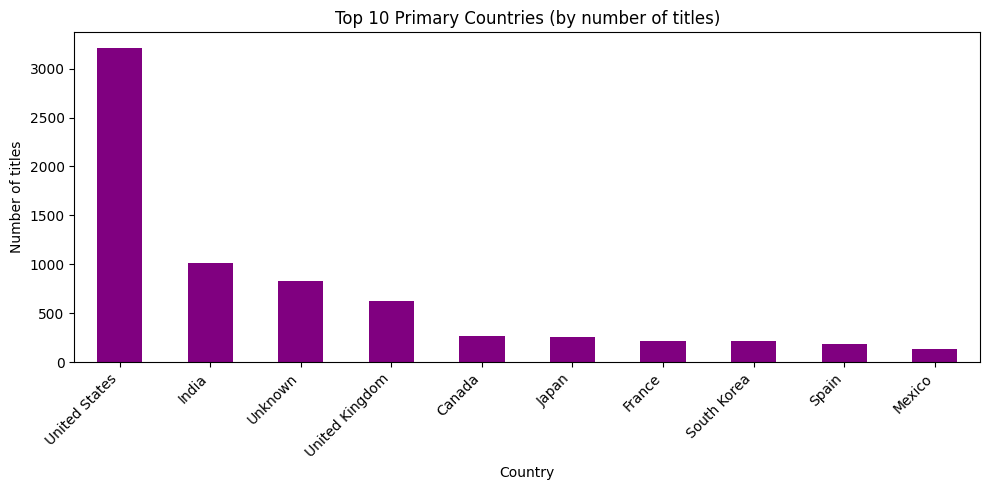

In [25]:
# 1) Bar chart - Top 10 countries
plt.figure(figsize=(10,5))
top_countries.plot(kind='bar', color = 'purple')
plt.title('Top 10 Primary Countries (by number of titles)')
plt.xlabel('Country')
plt.ylabel('Number of titles')
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.show()

The Bar chart shows top 10 countries producing the most netflix titles

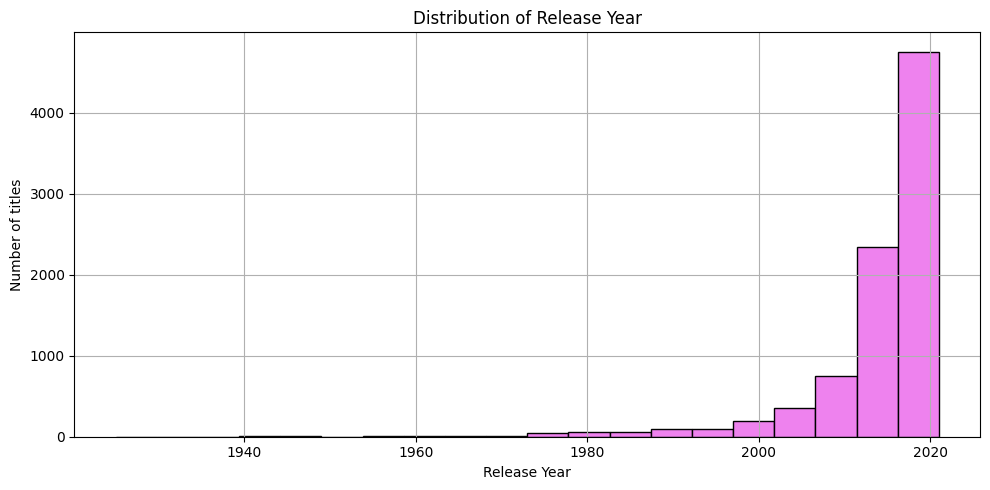

In [26]:
#2) Histogram - Distribution of release years
plt.figure(figsize=(10,5))
df_merged['release_year'].hist(bins=20,color = 'violet', edgecolor='black')
plt.title('Distribution of Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of titles')
plt.tight_layout()
plt.show()

The histogram shows that the majority of Netflix titles were released between 2010 and 2020, with a sharp spike in the final years. Older release years (before 2000) have very few titles, and earlier decades contain almost none.

This distribution is strongly right-skewed, indicating that Netflix’s catalog is dominated by modern content, especially titles released after the rise of streaming media (post-2010).

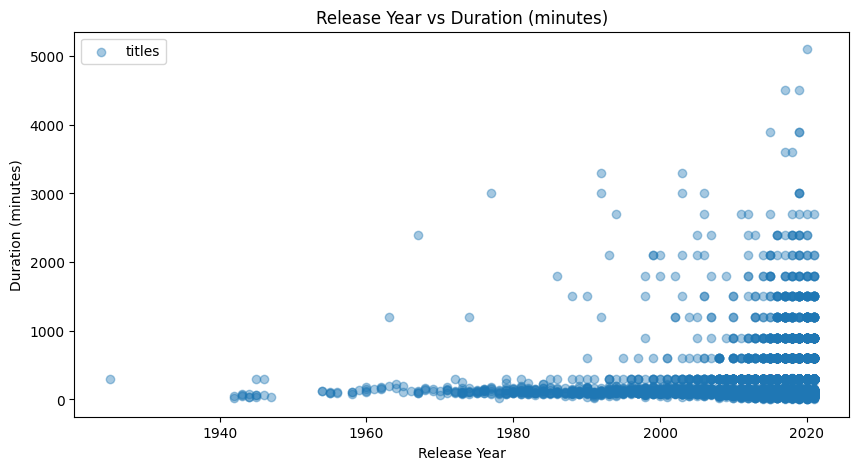

In [27]:
# 3) Scatter plot: Release year vs duration
plt.figure(figsize=(10,5))
plt.scatter(df_merged['release_year'], df_merged['duration_minutes'], alpha = 0.4, label= 'titles')
plt.title('Release Year vs Duration (minutes)')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')
plt.legend()
plt.show()

The scatter plot shows that there is no meaningful linear relationship between release year and duration, as the points are widely scattered with no visible trend. Most titles are concentrated between 2010 and 2021, reflecting Netflix’s rapid increase in content production in recent years.

Older decades have very few titles and mostly movies, which cluster around typical movie lengths (80–150 minutes). Newer titles show a much larger spread in duration due to the presence of TV shows which contains multipe season with multiple episodes, which can reach thousands of minutes. Overall, the plot indicates that release year does not predict content duration.

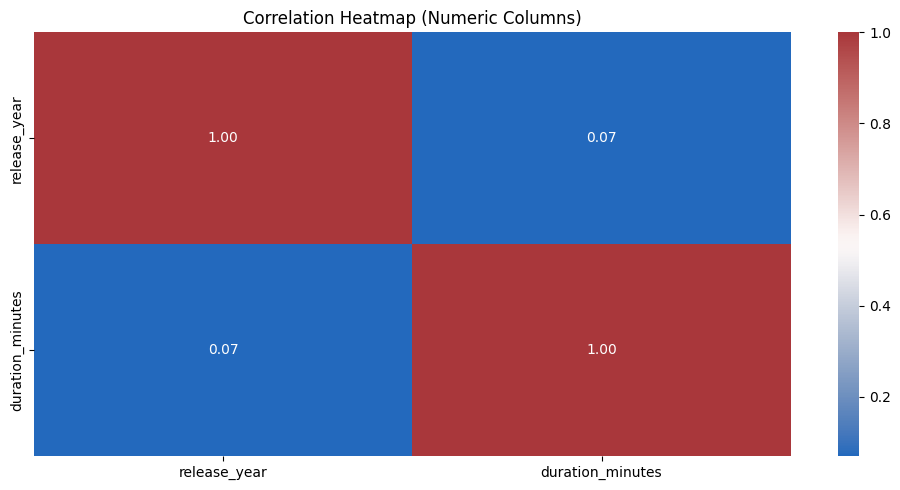

In [28]:
# 4) Heatmap: numeric correlation
corr = df_merged.select_dtypes(include = 'number').corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True, fmt='.2f', cmap='vlag')
plt.title('Correlation Heatmap (Numeric Columns)')
plt.tight_layout()
plt.show()

Heatmap of numerical columns which summarize correlations visually.
correlation between duration_minutes and realease_year 0.07 which is very close to zero or is extremely weak, which suggests that there is essentially no relationship between release year and duration.

# 5. Conclusions and Reflection 

**Main Findings:**
- Movies dominate the platform compared to TV Shows.
- The U.S. is leading content contributor followed by india.
- The top content rating is TV-MA(Adults)
- A large portion of Netflix titles are from recent years (2010–2021).
- Duration does not correlate strongly with release year.
- Netflix’s library shows rapid expansion over time, especially after 2010.

**Challenges Encountered:**
- date_added had inconsistent formats and missing values; parsing produced NaT for some rows which had null values and parsing was not possible.
- Missing country and director data filled with "Unknown" as dropping them would have resulted in loss of data.
- Duration field is inconsistently formatted (min, seasons).
- Correlation analysis is limited due to mostly categorical features.
- Text fields such as cast and genre contain multi-valued fields.

**Possible Improvements:**
- Compare Netflix with competitors like Amazon Prime or Disney+.
- Perform clustering on genres and countries.